<!-- ![Alt Text](https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/header.png) -->

<div style="display: flex; justify-content: flex-start; align-items: center;">
    <a href="https://colab.research.google.com/github/msfasha/307304-Data-Mining/blob/main/Part%206-Dimensions%20Reduction/6-1-principal_components_analysis.ipynb" target="_blank">
        <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" style="height: 25px; margin-right: 20px;">
    </a>
    <a href="https://www.youtube.com/watch?v=6d5MAlYjgz8" target="_blank">
        <img src="https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/youtube.png" alt="KMeans Youtube Video" style="height: 40px;">
    </a>
</div>

#### 1. **Introduction to Principal Component Analysis (PCA)**

**Principal Component Analysis (PCA)** is an unsupervised dimensionality reduction technique used to transform high-dimensional datasets into a lower-dimensional space while retaining most of the important information (variance).

The main goal of PCA is to reduce the complexity of the data while minimizing information loss.

**Applications of PCA**:
- Reducing the number of features in a dataset for machine learning tasks.
- Visualization of high-dimensional data.
- Removing noise and redundancy in data.

---

#### 2. **How PCA Works**

PCA works by finding new dimensions called **principal components** that capture the maximum variance in the data.

Each principal component is a linear combination of the original features, and they are orthogonal to each other (i.e., uncorrelated).

**Steps Involved in PCA**:

a. **Standardize the Data**: Ensure that the dataset has a mean of zero and unit variance for each feature.
b. **Compute the Covariance Matrix**: The covariance matrix shows the relationships (variances and covariances) between the features in the dataset.
c. **Compute Eigenvectors and Eigenvalues**: The eigenvectors of the covariance matrix represent the direction of the principal components, and the eigenvalues represent the magnitude of variance captured by these components.
d. **Sort Eigenvalues and Select Principal Components**: The principal components are ordered based on the eigenvalues, with the largest eigenvalue corresponding to the first principal component (which captures the most variance).
e. **Transform the Data**: The original data is transformed into the new space defined by the selected principal components.

---

#### 3. **Mathematical Explanation**

For a given dataset $ X $ with $ n $ observations and $ m $ features:

a. **Mean Center the Data**:
   Subtract the mean from each feature to center the data around zero.
   
   $$
   X_{centered} = X - \mu
   $$

b. **Covariance Matrix**:
   Calculate the covariance matrix $ \Sigma $:
   
   $$
   \Sigma = \frac{1}{n-1} X_{centered}^T X_{centered}
   $$

c. **Eigenvectors and Eigenvalues**:
   Compute the eigenvectors $ V $ and eigenvalues $ \lambda $ of the covariance matrix:
   
   $$
   \Sigma V = \lambda V
   $$

d. **Select Top Principal Components**:
   Choose the top $ k $ eigenvectors that correspond to the largest eigenvalues. These eigenvectors are the principal components.
   
e. **Project the Data**:
   Transform the data into the new space using the selected principal components:
   
   $$
   X_{new} = X_{centered} \cdot V_k
   $$

  
**Intuition Behind PCA**

1. **Variance and Information**: In data analysis, variance is often associated with information. The more variance a feature has, the more information it carries. PCA aims to find the directions (principal components) in which the data varies the most.

2. **Orthogonal Transformation**: PCA performs an orthogonal transformation of the data, meaning the new components are uncorrelated. This is useful because it removes redundancy in the data (if features are correlated).

3. **Dimensionality Reduction**: By focusing on the components that capture the most variance, PCA allows us to reduce the number of dimensions while retaining as much information as possible. This is particularly useful for visualization, noise reduction, and speeding up machine learning algorithms.

**Where Did the Formula Come From?**

The formula for PCA comes from the optimization problem of maximizing variance in the projected data. Specifically:

- **Objective**: Find a direction (vector) such that when the data is projected onto it, the variance of the projected data is maximized.
- **Constraint**: The vector must be a unit vector (i.e., its length is 1).

This optimization problem can be solved using Lagrange multipliers, leading to the eigenvalue problem for the covariance matrix. The eigenvectors of the covariance matrix are the directions that maximize variance, and the eigenvalues represent the amount of variance captured by each principal component.

**Summary**

- **Intuition**: PCA finds the directions of maximum variance in the data and projects the data onto these directions to reduce dimensionality while preserving as much information as possible.
- **Mathematical Foundation**: PCA is based on the covariance matrix, eigenvalues, and eigenvectors. The formula arises from solving an optimization problem to maximize variance in the projected data.
- **Applications**: PCA is used for dimensionality reduction, noise reduction, visualization, and speeding up machine learning algorithms.

---

#### 4. **Step-by-Step Example**

Let’s consider a small dataset with two features:

| Feature 1 | Feature 2 |
|-----------|-----------|
| 2.5       | 2.4       |
| 0.5       | 0.7       |
| 2.2       | 2.9       |
| 1.9       | 2.2       |
| 3.1       | 3.0       |
| 2.3       | 2.7       |
| 2.0       | 1.6       |
| 1.0       | 1.1       |
| 1.5       | 1.6       |
| 1.1       | 0.9       |

We want to reduce this dataset from two dimensions to one dimension using PCA.

#### **Step 1: Standardize the Data**

We first center the data by subtracting the mean from each feature:

| Feature 1 (Centered) | Feature 2 (Centered) |
|----------------------|----------------------|
| 0.69                 | 0.49                 |
| -1.31                | -1.21                |
| 0.39                 | 0.99                 |
| 0.09                 | 0.29                 |
| 1.29                 | 1.39                 |
| 0.49                 | 0.79                 |
| 0.19                 | -0.31                |
| -0.81                | -0.81                |
| -0.31                | -0.31                |
| -0.71                | -1.01                |

#### **Step 2: Compute the Covariance Matrix**

Next, we compute the covariance matrix:

$$
\Sigma = \begin{bmatrix}
\text{Var}(Feature 1) & \text{Cov}(Feature 1, Feature 2) \\
\text{Cov}(Feature 1, Feature 2) & \text{Var}(Feature 2)
\end{bmatrix}
$$

After calculation, the covariance matrix is:

$$
\Sigma = \begin{bmatrix}
0.61655556 & 0.61544444 \\
0.61544444 & 0.71655556
\end{bmatrix}
$$

#### **Step 3: Compute Eigenvectors and Eigenvalues**

Using linear algebra, we compute the eigenvalues and eigenvectors of the covariance matrix:

- **Eigenvalues**: $ \lambda_1 = 1.284 $, $ \lambda_2 = 0.049 $
- **Eigenvectors**:
  $$
  v_1 = \begin{bmatrix} 0.67787 \\ 0.73518 \end{bmatrix}, v_2 = \begin{bmatrix} -0.73518 \\ 0.67787 \end{bmatrix}
  $$

#### **Step 4: Select Principal Components**

Since the first eigenvalue ($ \lambda_1 = 1.284 $) is much larger than the second ($ \lambda_2 = 0.049 $), the first principal component captures most of the variance. Therefore, we select the first eigenvector $ v_1 $ as our principal component.

#### **Step 5: Project the Data**

We project the centered data onto the first principal component:

$$
X_{new} = X_{centered} \cdot v_1
$$

This gives us the data in the reduced one-dimensional space.

---

#### 5. **Python Code Example**

Here's how you can implement PCA using Python's `scikit-learn` library:

In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Create a dataset
data = {'Feature 1': [2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2.0, 1.0, 1.5, 1.1],
        'Feature 2': [2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9]}

df = pd.DataFrame(data)

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Step 3: Apply PCA
pca = PCA(n_components=1)  # Reduce to 1 dimension
X_pca = pca.fit_transform(X_scaled)

# Step 4: Results
print("Original Data:\n", df)
print("\nTransformed Data (1 Principal Component):\n", X_pca)
print("\nExplained Variance Ratio:", pca.explained_variance_ratio_)

# Step 5: Optional - Transform back to original space to see data variance captured
X_projected_back = pca.inverse_transform(X_pca)
print("\nReconstructed Data:\n", X_projected_back)

Original Data:
    Feature 1  Feature 2
0        2.5        2.4
1        0.5        0.7
2        2.2        2.9
3        1.9        2.2
4        3.1        3.0
5        2.3        2.7
6        2.0        1.6
7        1.0        1.1
8        1.5        1.6
9        1.1        0.9

Transformed Data (1 Principal Component):
 [[ 1.08643242]
 [-2.3089372 ]
 [ 1.24191895]
 [ 0.34078247]
 [ 2.18429003]
 [ 1.16073946]
 [-0.09260467]
 [-1.48210777]
 [-0.56722643]
 [-1.56328726]]

Explained Variance Ratio: [0.96296464]

Reconstructed Data:
 [[ 0.76822373  0.76822373]
 [-1.63266515 -1.63266515]
 [ 0.87816931  0.87816931]
 [ 0.2409696   0.2409696 ]
 [ 1.54452629  1.54452629]
 [ 0.82076675  0.82076675]
 [-0.06548139 -0.06548139]
 [-1.04800846 -1.04800846]
 [-0.40108966 -0.40108966]
 [-1.10541102 -1.10541102]]


**Explanation**:
- **Step 1**: We create a simple dataset with two features.
- **Step 2**: We standardize the data so that it has a mean of 0 and variance of 1.
- **Step 3**: We apply PCA to reduce the data to one principal component.
- **Step 4**: We print the transformed data (now in 1 dimension) and the amount of variance captured by this principal component.

---

### Implemented PCA on Customers Dataset

In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Get the data
data = pd.read_csv('https://raw.githubusercontent.com/msfasha/307304-Data-Mining/refs/heads/main/datasets/mall_customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Implement PCA

In [15]:
# Encode the Gender column (categorical to numerical)
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Select features for PCA
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
pca_result = pca.fit_transform(scaled_data)

# Add the PCA result to the original data
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# Display the first few rows of the transformed data
print(data[['PCA1', 'PCA2']].head())

       PCA1      PCA2
0 -0.406383 -0.520714
1 -1.427673 -0.367310
2  0.050761 -1.894068
3 -1.694513 -1.631908
4 -0.313108 -1.810483


This code will output the new features (PCA1 and PCA2) that represent the reduced dimensions of the dataset.

### Visualize the New Dimensions Against the Gender (Categorical Value)

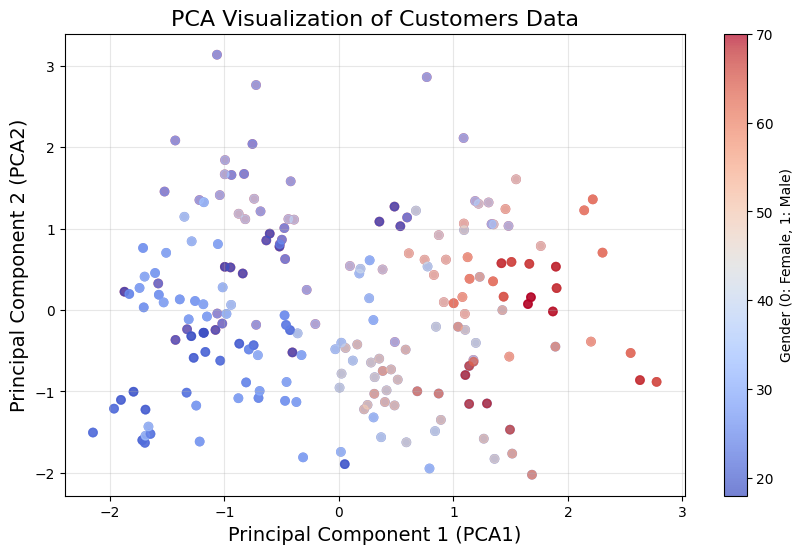

In [16]:
import matplotlib.pyplot as plt

# Scatter plot for PCA components
plt.figure(figsize=(10, 6))
plt.scatter(data['PCA1'], data['PCA2'], c=data['Gender'], cmap='coolwarm', alpha=0.7)
plt.scatter(data['PCA1'], data['PCA2'], c=data['Age'], cmap='coolwarm', alpha=0.7)


# Add plot labels and title
plt.title('PCA Visualization of Customers Data', fontsize=16)
plt.xlabel('Principal Component 1 (PCA1)', fontsize=14)
plt.ylabel('Principal Component 2 (PCA2)', fontsize=14)

# Add a color bar to indicate gender
plt.colorbar(label='Gender (0: Female, 1: Male)')
plt.grid(alpha=0.3)

# Show plot
plt.show()


Color Mapping: The color of each point is determined by the "Gender" column (0 for Female, 1 for Male), which helps to observe any clustering or grouping patterns related to gender.

We can use the plot to identify patterns, clusters, or separations between genders or other characteristics

### Visualize the New Dimensions Against All the Data Features

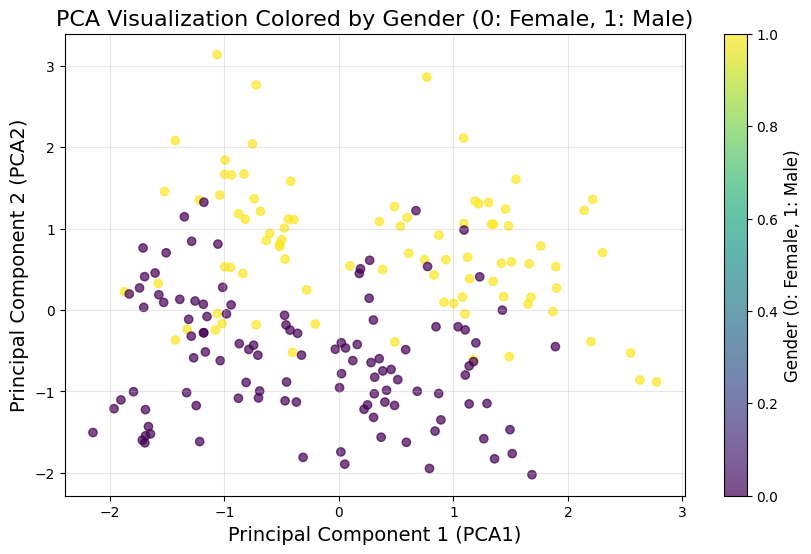

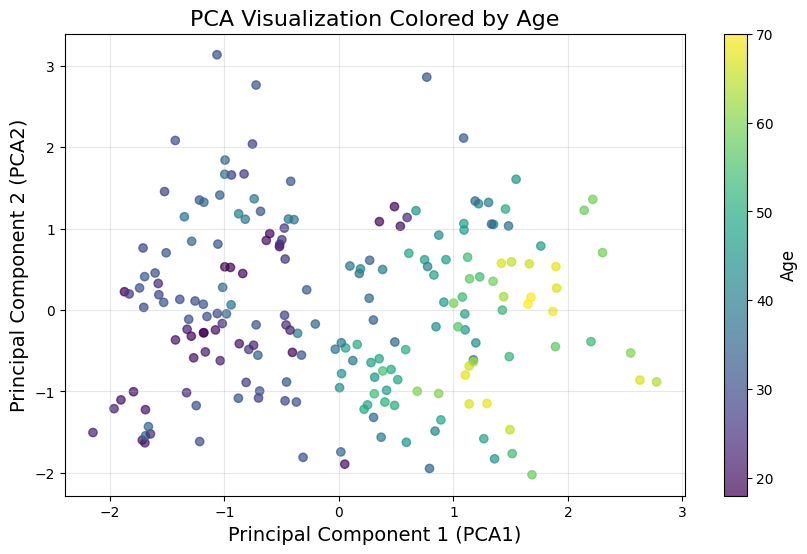

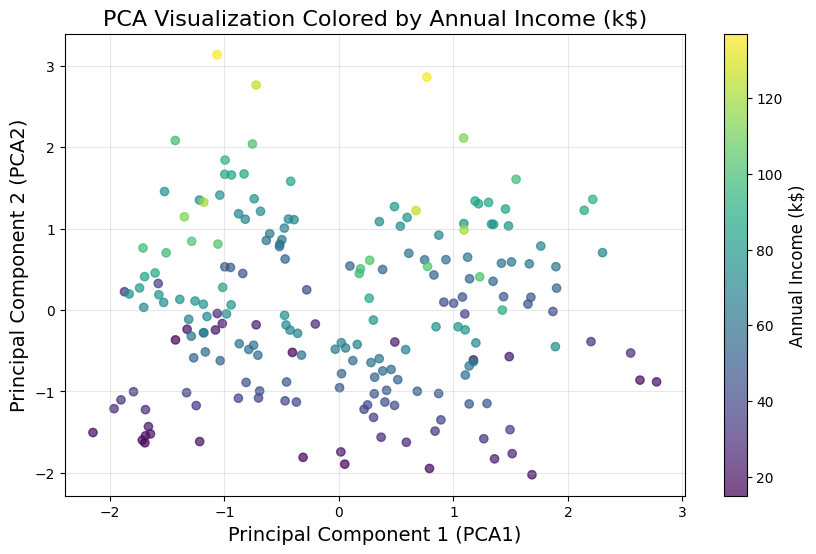

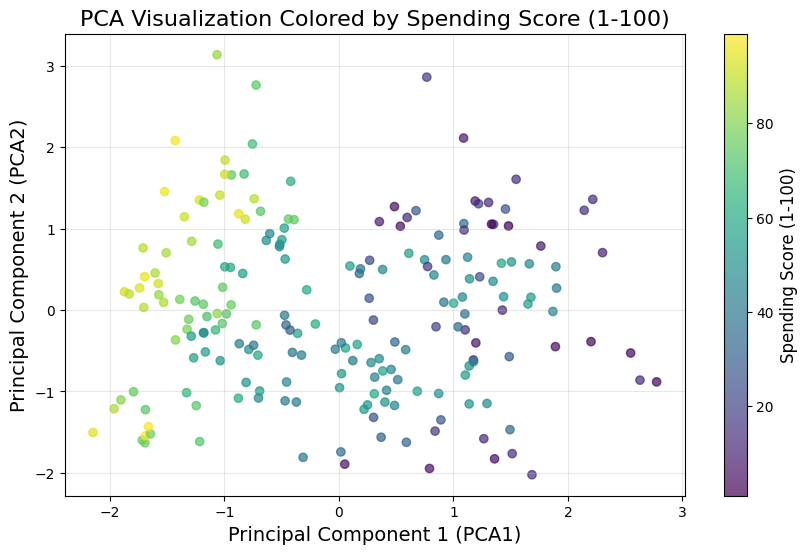

In [17]:
import matplotlib.pyplot as plt

# Function to create scatter plots with different color mappings
def plot_pca(data, color_feature, color_label):
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(data['PCA1'], data['PCA2'], c=data[color_feature], cmap='viridis', alpha=0.7)
    plt.title(f'PCA Visualization Colored by {color_label}', fontsize=16)
    plt.xlabel('Principal Component 1 (PCA1)', fontsize=14)
    plt.ylabel('Principal Component 2 (PCA2)', fontsize=14)
    cbar = plt.colorbar(scatter)
    cbar.set_label(color_label, fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

# Plot colored by Gender
plot_pca(data, 'Gender', 'Gender (0: Female, 1: Male)')

# Plot colored by Age
plot_pca(data, 'Age', 'Age')

# Plot colored by Annual Income (k$)
plot_pca(data, 'Annual Income (k$)', 'Annual Income (k$)')

# Plot colored by Spending Score
plot_pca(data, 'Spending Score (1-100)', 'Spending Score (1-100)')

### How Can PCA Benifit The Analysis of Customers Dataset?

PCA can be leveraged for various purposes in a customer dataset to gain insights, enhance analytics, and improve machine learning models. Here are some additional uses of PCA for the given customer dataset:

##### a. **Data Visualization**
   - **Exploration**: PCA helps in visualizing high-dimensional data in 2D or 3D spaces. This makes it easier to observe clustering patterns or separations in customer behavior based on features like age, income, or spending.
   - **Cluster Validation**: By visualizing reduced dimensions, you can assess whether natural clusters (e.g., low-income vs. high-income groups) exist in the data.

##### b. **Feature Reduction for Machine Learning**
   - **Simplifying Models**: PCA reduces the number of features while retaining the most important variance, simplifying machine learning models (e.g., logistic regression, K-means, etc.).
   - **Overfitting Prevention**: Reducing dimensionality helps reduce noise and prevent overfitting in predictive models.
   - **Speed**: Fewer dimensions result in faster training and prediction times for machine learning models.

##### c. **Clustering Analysis**
   - **Customer Segmentation**: PCA can be used as a preprocessing step to simplify data before applying clustering algorithms like K-Means or DBSCAN. Segments might represent customer groups such as "high spenders" or "young budget-conscious shoppers."
   - **Interpretability**: Reduced dimensions often align with patterns, like "spending tendencies" or "income level," making clusters easier to explain.

##### d. **Anomaly Detection**
   - **Identifying Outliers**: In the reduced feature space, outliers or unusual customer profiles can be identified as points far from the main data cluster. These could represent unique customer behaviors worth exploring further.

##### e. **Correlation and Redundancy Analysis**
   - PCA helps identify redundancies or correlations in features (e.g., "Annual Income" and "Spending Score"). The transformed components show uncorrelated dimensions, simplifying feature analysis.

##### f. **Trend Analysis**
   - **Behavioral Trends**: By analyzing the principal components, you can observe dominant patterns or trends, such as:
     - High income correlating with low spending scores (or vice versa).
     - Gender-specific spending or age-specific tendencies.

##### g. **Marketing Insights**
   - **Targeted Marketing**: Use PCA results to group customers into actionable segments for personalized marketing campaigns.
   - **Customer Journey Mapping**: PCA can simplify data for visualizing and understanding different stages of the customer journey.

##### h. **Data Preprocessing for Time-Series Analysis**
   - If the dataset includes customer behavior over time (e.g., monthly spending), PCA can reduce the complexity of time-series features to highlight the most significant behavioral trends.

##### i. **Improved Recommendations**
   - **Personalization**: PCA can reduce feature dimensionality for building recommender systems, enabling better similarity measures among customers.
   - **Feature Engineering**: Use PCA components as input features to enhance collaborative filtering algorithms.

##### j. **Noise Reduction**
   - PCA helps denoise the data by removing components that contribute minimally to variance, ensuring only meaningful patterns are retained.

#### 6. **Conclusion**

PCA is a powerful technique for reducing the dimensionality of datasets, which is especially useful in machine learning when dealing with high-dimensional data. It helps simplify models, reduces computational complexity, and improves model performance by focusing on the most important features that capture the most variance. It serves as both an exploratory and preprocessing technique, enabling data scientists and businesses to uncover deeper insights, improve model performance, and optimize decision-making.